In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
# %matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
# import seawater as sw

-----calc
sys glob os
numpy
netcdf
ipdb
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
ipdb
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots
CPU times: user 1.43 s, sys: 1.05 s, total: 2.48 s
Wall time: 6.59 s


In [5]:
fpath_data = '/work/mh0256/m300522/spinup_r2b9/to_r05_ocean_era51h_r2b9_19268-ULE_2010-2019.nc'
ds = xr.open_dataset(fpath_data)

In [12]:
lat = ds.lat
lon = ds.lon
depth = ds.depth
j0 = ((lat)**2).argmin()

In [16]:
lon

<xarray.DataArray 'lon' (lon: 720)>
array([  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

<xarray.DataArray 'time' (time: 10)>
array(['2010-02-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-02-01 2011-02-01 ... 2019-06-01
Attributes:
    standard_name:  time
    axis:           T

In [24]:
tref = ds['to'][1,:,j0,:].compute()

In [32]:
ds_sel.to.shape

(10, 128, 360, 720)

<IPython.core.display.Javascript object>


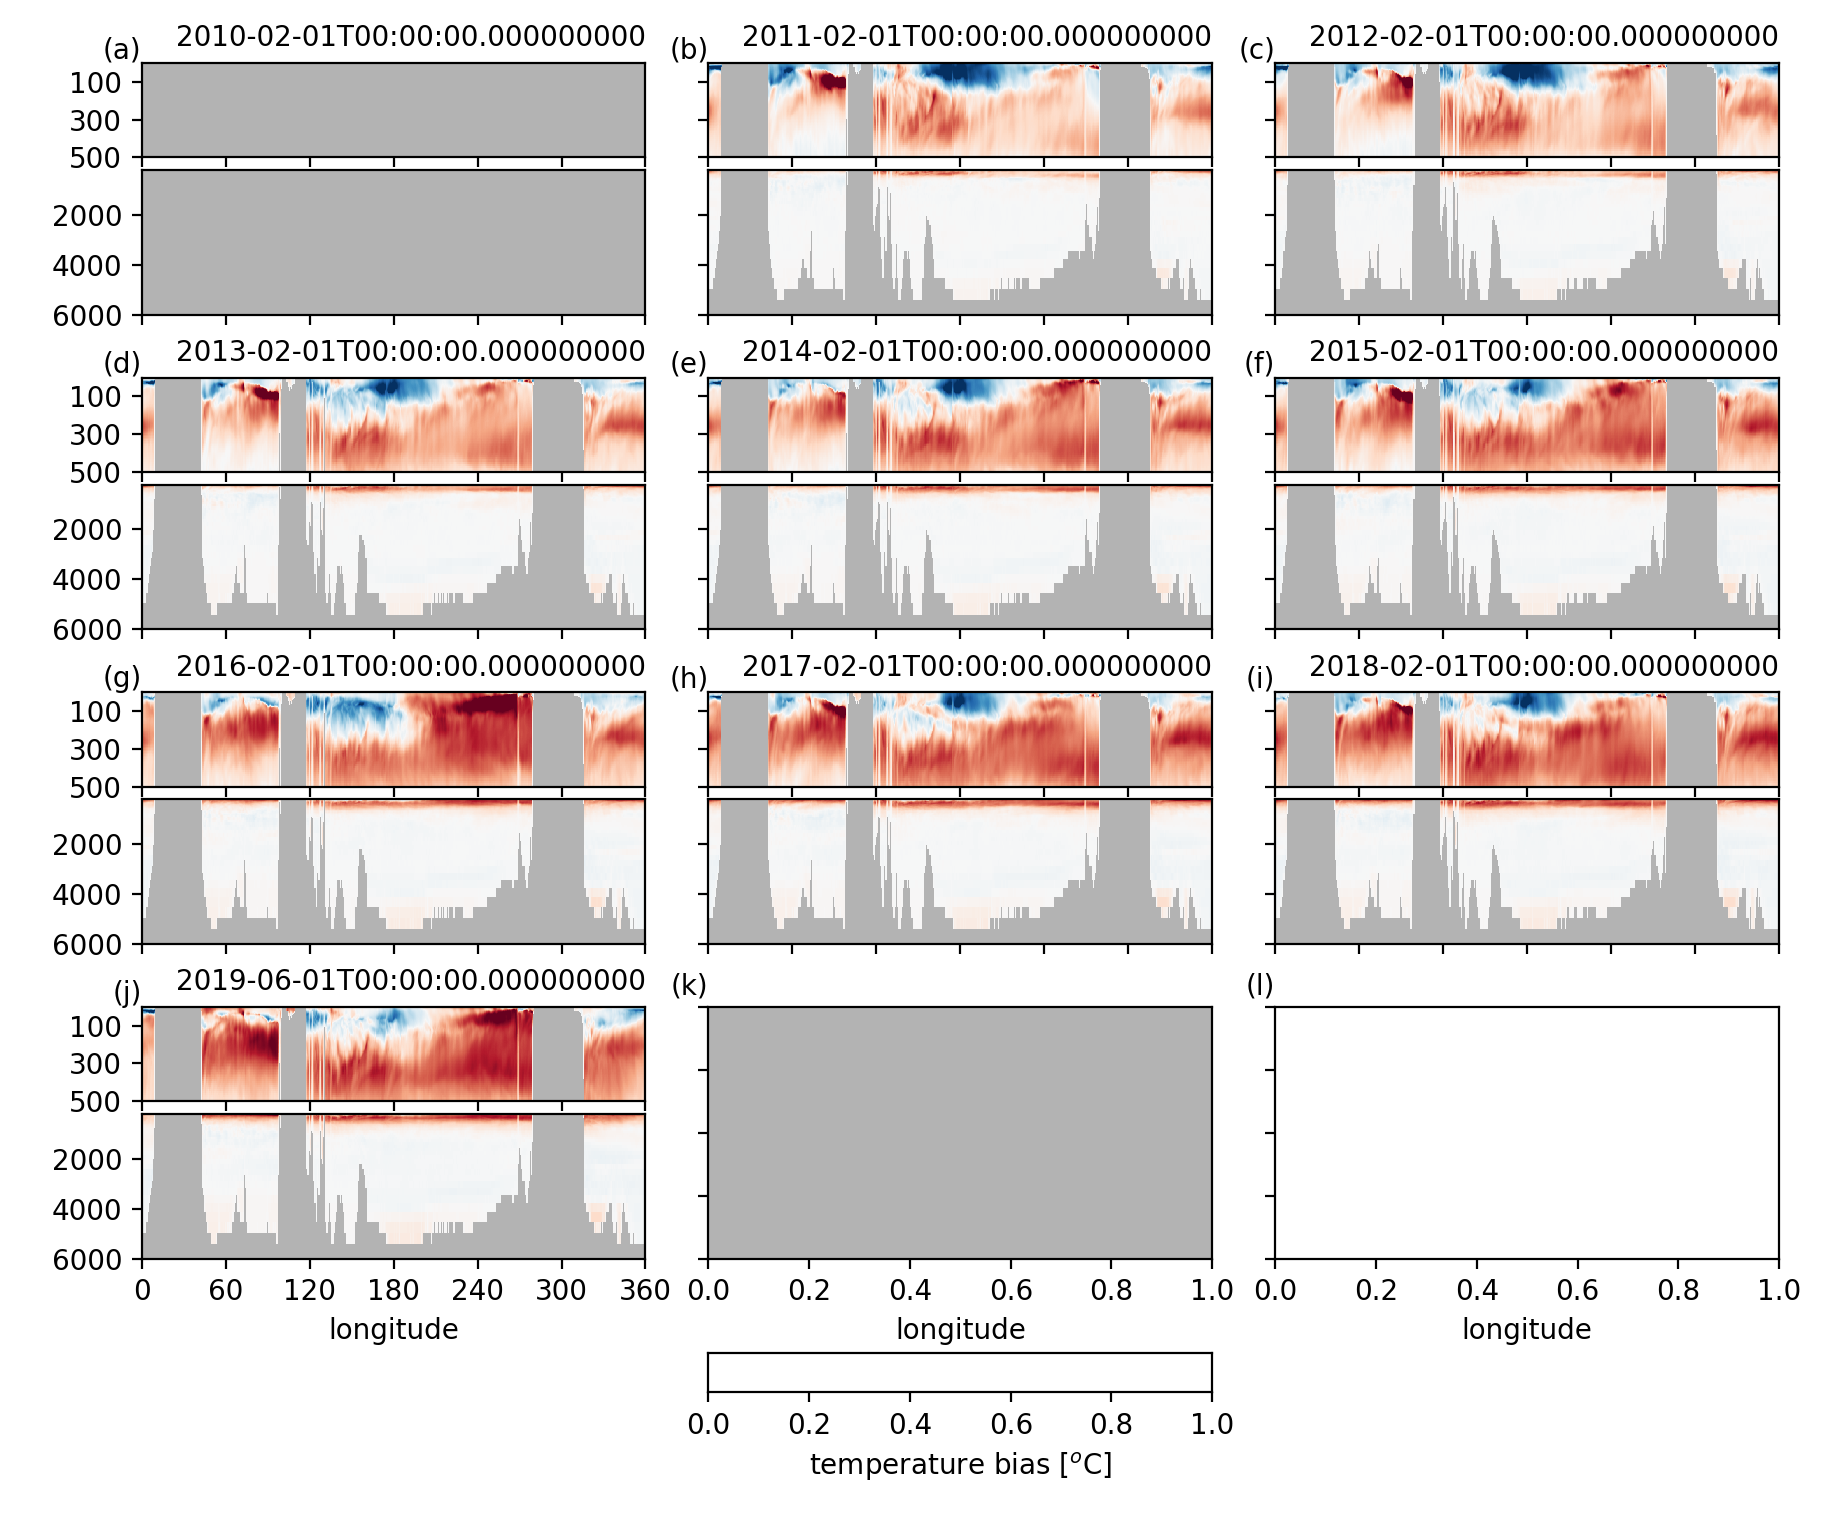

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [33]:
%%time
hca, hcb = pyic.arrange_axes(3, 4, asp=0.5, fig_size_fac=0.8, plot_cb='bottom', 
                             sharex=True, sharey=True, xlabel='longitude',
                            )
ii=-1

ds_sel = ds.isel(time=slice(1,None,12))
tref = ds_sel['to'][0,:,j0,:].compute()
for ll in range(ds_sel.time.size):
    print(f'll = {ll}', end='\r')
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    data = ds_sel['to'][ll,:,j0,:]-tref
    data = data.where(data!=0.) 
    ax = pyic.split_axes_vertically(ax)
    hca[ii] = ax
    for axsp in ax.axs:
        pyic.shade(lon, depth, data, ax=axsp, cax=cax, clim=5)
    ax.set_title(f'{ds_sel.time[ll].data}', loc='right', fontsize=10)
hcb[-1].set_xlabel('temperature bias [$^o$C]')

for ax in hca:
    ax.set_facecolor('0.7')
    ax.set_ylim([6000,200],[200,0])
    ax.set_xticks(np.arange(0,3700,60))
    ax.set_xlim(0,360)
    ax.set_yticks([6000,4000,2000], [500,300,100])
    
# save_fig(f'{path_fig}/{thisscriptname}_tbias_eq_along_sec.png')